Load TensorFlow Libary and Keras

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# Load the MNIST dataset
dataset = tf.keras.datasets.mnist

# Split the dataset into train and test sets
(x_train, y_train), (x_test, y_test) = dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
##split the training data into two sets: a validation set and a training set.
X_valid, X_train = x_train[:5000] / 255., x_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.

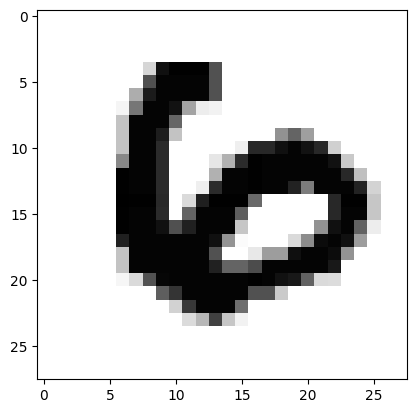

In [6]:
plt.imshow(X_train[4000], cmap="binary")
plt.show()

In [7]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
 class_names = [0,1, 2, 3, 4, 5, 6, 7, 8, 10]

In [9]:
class_names[y_train[4000]]

6

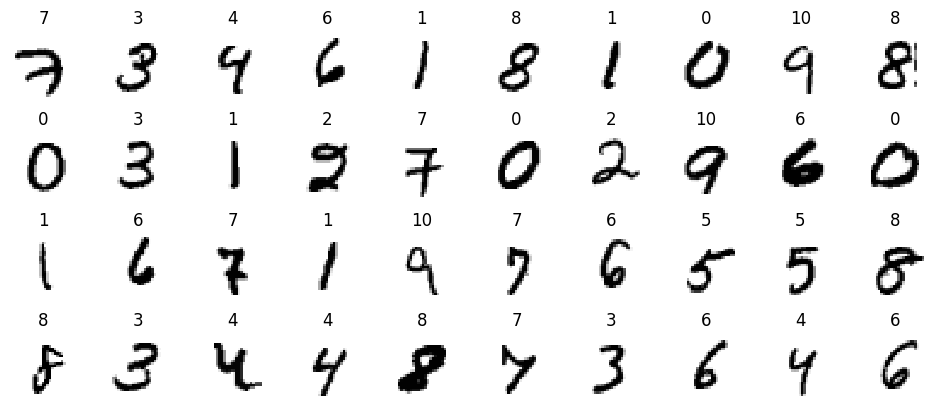

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Design and build Neural Network to classify the MINST

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28, 28], name="input_layer"))
model.add(keras.layers.Flatten(name="1st_layer_flatten"))
model.add(keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"))
model.add(keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_layer"))

Check the model object

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten)  (None, 784)              0         
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


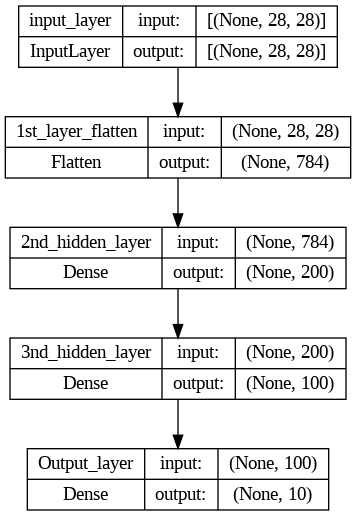

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

Complie the model

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Train the model

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6354 - accuracy: 0.8326 - val_loss: 0.3196 - val_accuracy: 0.9122
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.9130 - val_loss: 0.2512 - val_accuracy: 0.9298
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9288 - val_loss: 0.2161 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2128 - accuracy: 0.9393 - val_loss: 0.1900 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1861 - accuracy: 0.9472 - val_loss: 0.1657 - val_accuracy: 0.9538
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1654 - accuracy: 0.9522 - val_loss: 0.1493 - val_accuracy: 0.9578
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1481 - accuracy: 0.9576 - val_loss: 0.1378 - val_accuracy

Plot the learning curve

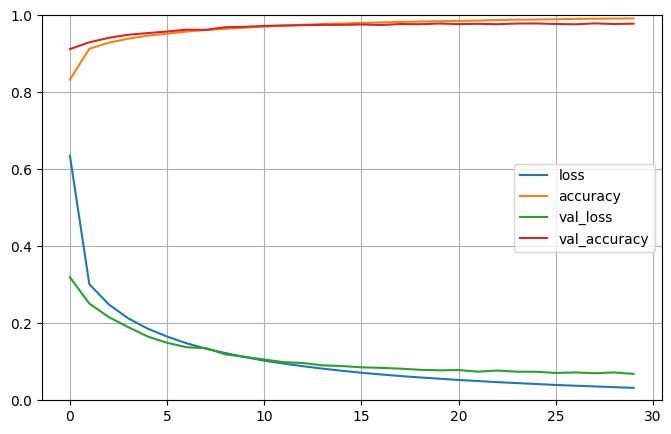

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9766


[0.07385710626840591, 0.9765999913215637]

In [19]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[1.0158514e-06, 7.2424740e-07, 7.2484886e-06, ..., 9.9979806e-01,
        5.3714148e-06, 1.6071694e-05],
       [1.4610822e-07, 1.0424084e-05, 9.9977875e-01, ..., 1.5255067e-12,
        6.0575076e-05, 9.5325668e-13],
       [5.0647450e-06, 9.9691671e-01, 5.1657291e-04, ..., 9.2236965e-04,
        8.6031103e-04, 6.7128552e-05],
       ...,
       [1.1216461e-11, 8.9993374e-11, 4.1266040e-12, ..., 5.8321416e-06,
        1.0409703e-07, 2.0843586e-06],
       [6.6244679e-06, 1.3208243e-07, 7.1638393e-09, ..., 7.3929920e-09,
        1.3736790e-04, 8.6128233e-09],
       [1.6864136e-06, 1.1305348e-11, 3.8338072e-07, ..., 6.7195187e-11,
        3.9826680e-09, 1.1463538e-10]], dtype=float32)